Example of the use of the function that allows the training on a dataset of noisy and blurred images, generated using the algorithm presented by Boracchi and Foi. 

This function uses a constant trajectory and noise levels, and randomly picks an exposure value. The trajectory can be generated by the traj_saver.py script.

In [2]:
import os
os.chdir(os.path.expanduser(r'C:\Users\innoc\PycharmProjects\csb-dataset-generator'))

In [3]:
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt 

from torch_dataset_loaders.generic_degradation_dataset import GenericDegradationDataset
from random_degradation.constant_trajectory import ConstantTrajectory

In [4]:
image_size = 256
psf_size = 64
motion_size = 32  # max radius in pixel
batch_size = 8
imagenet_train_path = r'C:\Users\innoc\PycharmProjects\PyConvBlur\datasets\imagenet\ILSVRC\Data\CLS-LOC\val'
imagenet_test_path = r'C:\Users\innoc\PycharmProjects\PyConvBlur\datasets\imagenet\ILSVRC\Data\CLS-LOC\val'
trajpath: str = r'C:\Users\innoc\PycharmProjects\csb-dataset-generator\package\psf_generation\trajectories\traj2'
with open(trajpath+'.npy', 'rb') as f:
    trajectory = np.load(f)
degradation = ConstantTrajectory(trajectory, psf_size=psf_size)
degrade = degradation.process_image
train_dataset = GenericDegradationDataset(imagenet_train_path, image_size=image_size, degrade=degrade, crop='random')
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,)

Plotting a batch, to show the processed images

image 0 blurred:


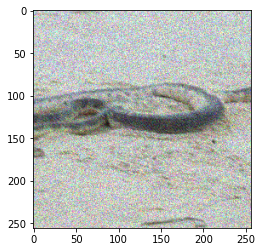

image 0 ground truth:


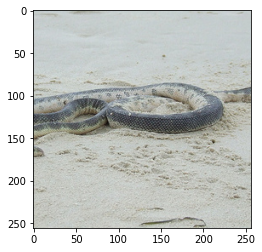

image 1 blurred:


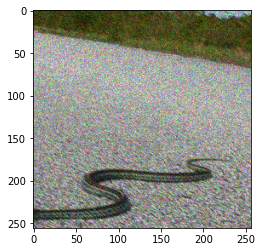

image 1 ground truth:


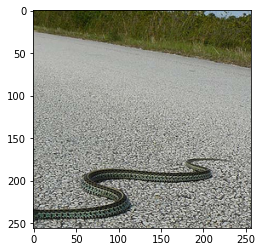

image 2 blurred:


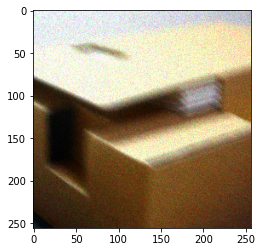

image 2 ground truth:


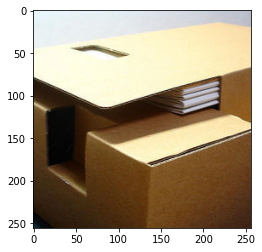

image 3 blurred:


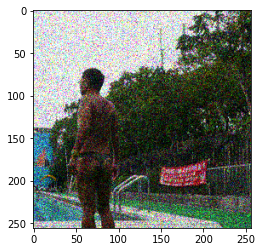

image 3 ground truth:


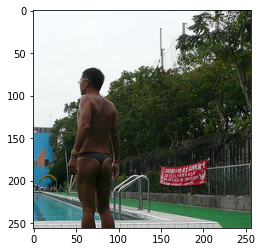

image 4 blurred:


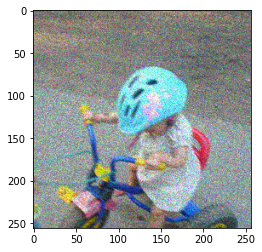

image 4 ground truth:


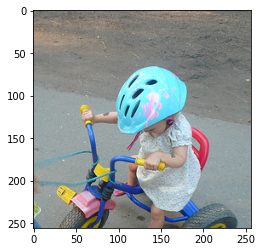

image 5 blurred:


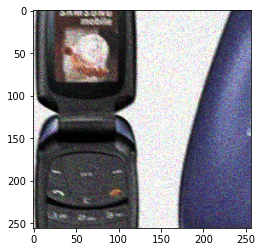

image 5 ground truth:


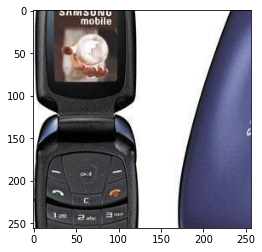

image 6 blurred:


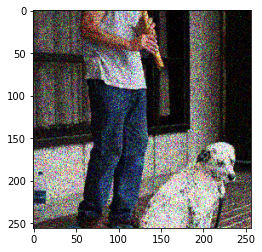

image 6 ground truth:


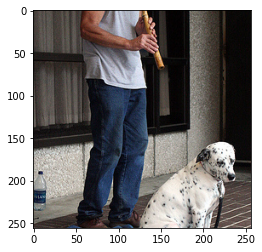

image 7 blurred:


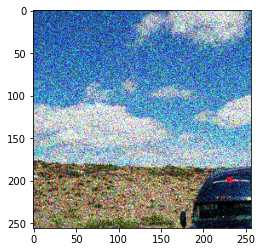

image 7 ground truth:


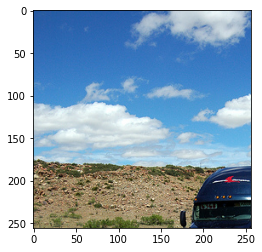

In [5]:
train_batch, label_batch = next(iter(train_dataloader))
train_batch = np.moveaxis(train_batch.numpy(), 1, -1)
label_batch = np.moveaxis(label_batch.numpy(), 1, -1)
for i, _ in enumerate(train_batch):
    print('image '+str(i)+' blurred:')
    plt.imshow(train_batch[i])
    plt.show()
    print('image '+str(i)+' ground truth:')
    plt.imshow(label_batch[i])
    plt.show()

The train and test dataloaders can then be used to train neural networks in PyTorch